# Test fluctuations of stroboscopic Hamiltonian elements against the high-frequency Hamiltonian

In [1]:
import numpy as np
from math import cos, sin
from numpy import pi
import scipy.integrate as integrate
from scipy.special import jv
from floquet_simulations.hamiltonians import CreateHFGeneral, RemoveWannierGauge
from floquet_simulations.periodic_functions import Cosine
from floquet_simulations.plot_functions import PlotParams, PlotAbsRealImagHamiltonian, PlotRealHamiltonian
from floquet_simulations.utilities import PhaseShiftPositive
import matplotlib.pyplot as plt
from pathlib import Path
import time


In [2]:
phi3_frac = 2*pi/10#pi/4
# phi3_frac = np.round(phi3_frac, 3)
phi3 = pi*phi3_frac
omega0 = 8
omega2 = omega0
omega3 = 2*omega0
T = 2*pi/omega0
A2 = 15
A3 = 15
centres = [1,2]
funcs= [Cosine, Cosine]
paramss = [[A2, omega2, 0, 0], [A3, omega3, phi3, 0]]

In [3]:
# first term expansion term
J23_real = (1/T)*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -T/2, T/2)[0]
J23_imag = 1j*(1/T)*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -T/2, T/2)[0]
# we are removing esimate of absolute error
J23 = J23_real + J23_imag

# J31 = -(1/T)*integrate.quad(lambda t: cos(-A3/omega3*sin(omega3*t + phi3)), -T/2, T/2)[0]
J31 = jv(0, A3/omega3)
# J31_imag = -1j*(1/T)*integrate.quad(lambda t: sin(-A3/omega3*sin(omega3*t + phi3)), -T/2, T/2)[0]

J12 = jv(0,A2/omega2)

hf_ft_flux = np.angle(J12*J23*J31); 


In [4]:

_, HF = CreateHFGeneral(3, centres, funcs, paramss, T, circle_boundary=1, t0=0)

In [5]:
if not np.isnan(HF).all():
    for site in range(3):
        HF = RemoveWannierGauge(HF, site, 3)

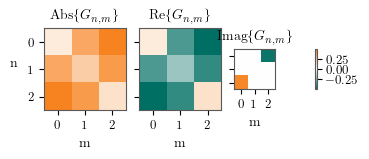

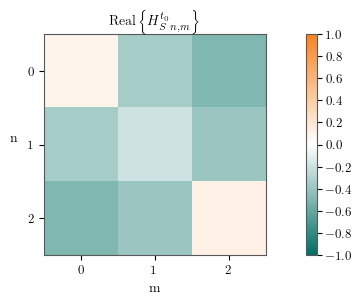

In [6]:
PlotParams(fontsize=10)
PlotAbsRealImagHamiltonian(HF, figsize=(8,8))
PlotRealHamiltonian(HF, figsize=(8,8))
# PlotAbsRealImagHamiltonian(HF_FT)
# PlotRealHamiltonian(HF_FT)

In [5]:
n_t0 = 60
t0_lst = np.linspace(0,1,n_t0)
hf_flux_lst = []
for t0 in t0_lst:
    _, HF = CreateHFGeneral(3, centres, funcs, paramss, T, circle_boundary=1, t0=t0)
    hf_flux = np.angle(-HF[1,0]*HF[2,1]*HF[0,2]); 
    # hf_flux = np.where(hf_flux<0 , 2*pi+hf_flux, hf_flux); hf_flux = np.where(hf_flux>2*pi , hf_flux-2*pi, hf_flux) 
    hf_flux_lst.append(hf_flux)
    

In [6]:
print(np.max(hf_flux_lst)/pi - np.min(hf_flux_lst)/pi/2, hf_ft_flux/pi)

0.22905445700618515 0.26251739605460783


In [28]:
# calculate variations in strob flux vs high freq flux
max_flux_fluc = np.max([np.abs(np.max(hf_flux_lst)/hf_ft_flux - 1), np.abs(np.min(hf_flux_lst)/hf_ft_flux - 1)])*100

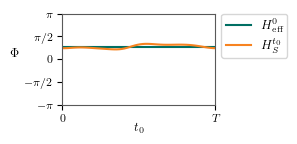

In [6]:
cm_unit = 1/2.54
PlotParams(fontsize=9)
fig, ax = plt.subplots(figsize=(5*cm_unit,3*cm_unit))
ax.plot(t0_lst, np.full(n_t0, hf_ft_flux),  color = '#006F63', linestyle = '-', label=r"$H_{\mathrm{eff}}^{0}$")
ax.plot(t0_lst, hf_flux_lst, color='#F78320', label=r"$H_S^{t_0}$")
# ax.set_ylim([0,pi])
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
ax.set_xlabel(r"$t_0$", labelpad=-1)
ax.set_ylabel(r"$\Phi$", rotation=0, labelpad=7)
ax.set_xticks([0,1])
ax.set_xlim([0,1])
# plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.set_xticklabels([r"$0$", r"$T$"])
ax.set_yticks([-pi, -pi/2, 0,pi/2, pi])
ax.set_yticklabels([r"$-\pi$", r"$-\pi/2$", r"$0$", r"$\pi/2$", r"$\pi$"])
# ax.set_title(r"$\alpha=1, \beta=2, A_2="+str(A2)+", A_3="+str(A3)+", \omega="+str(omega0)+", \phi_3="+"{:.2f}".format(phi3_frac)+"\pi, $"+"max "+r"$\Phi$"+ " fluc"+r"$ = "+"{:.2f}".format(max_flux_fluc)+ "\%$")
fig.savefig(Path().absolute().parent.parent.parent/"figures"/"local_mod_paper"/"stroboscopic_flux_fluctuations.pdf", format="pdf", bbox_inches="tight")
plt.show()

array([0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272,
       0.82472272, 0.82472272, 0.82472272, 0.82472272, 0.82472272])

In [10]:
# #set params
# omega0 = 8
# omega2 = omega0
# omega3 = 2*omega0
# T = 2*pi/omega0
# centres = [1,2]
# funcs= [Cosine, Cosine]
# a3_time = 0

# max_flux_flucs = []
# for A3 in np.linspace(0,40,41):
    
    
#     for A2 in np.linspace(0,40,41):
#         print(A3, A2, a3_time)
#         t0 = time.process_time()

#         for phi3 in np.linspace(0,2*pi, 10)[1:-1]:
#             # print(phi3)

#             # first term expansion term
#             J23_real = -(1/T)*integrate.quad(lambda t: cos(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -T/2, T/2)[0]
#             J23_imag = -1j*(1/T)*integrate.quad(lambda t: sin(A3/omega3*sin(omega3*t + phi3) - A2/omega2*sin(omega2*t)), -T/2, T/2)[0]
#             # we are removing esimate of absolute error
#             J23 = J23_real + J23_imag

#             J31 = -jv(0,A3/omega3)

#             J12 = -jv(0,A2/omega2)

#             hf_ft_flux =  np.angle(np.conj(J23)); hf_ft_flux = PhaseShiftPositive(hf_ft_flux)


#             paramss = [[A2, omega2, 0, 0], [A3, omega3, phi3, 0]]
#             strob_fluxes = np.empty(20)
#             for i, t0 in enumerate(np.linspace(0,1,20)):
#                 _, HF = CreateHFGeneral(3, centres, funcs, paramss, T, circle_boundary=1, t0=t0)
#                 strob_flux = np.angle(HF[0,1]) + np.angle(HF[1,2]) + np.angle(HF[2,0]); strob_flux = PhaseShiftPositive(strob_flux)
#                 strob_fluxes[i]=strob_flux


#             max_flux_fluc = np.max([np.abs(np.max(strob_fluxes)/strob_fluxes - 1), np.abs(np.min(strob_fluxes)/strob_fluxes - 1)])*100
#             max_flux_flucs.append(max_flux_fluc)
            
#         a3_time = time.process_time() - t0

In [11]:
# print(phi3)

# _, HF = CreateHFGeneral(3, centres, funcs, paramss, T, circle_boundary=1, t0=t0)
# strob_flux = np.angle(HF[0,1]) + np.angle(HF[1,2]) + np.angle(HF[2,0]); strob_flux = PhaseShiftPositive(strob_flux)



In [12]:
HF

array([[ 0.0784478+0.j       , -0.3461184+0.0045859j,
        -0.4024416-0.5521928j],
       [-0.3461184-0.0045859j, -0.1943272+0.j       ,
        -0.3881691-0.0772808j],
       [-0.4024416+0.5521928j, -0.3881691+0.0772808j,
         0.1158794+0.j       ]])